In [ ]:
#Было убрано предупреждение о замене маркапа в BeautifulSoup
import wikipedia
import re

#de: [a-zäöüß]
#es: [a-zñáéíóú]
#it: [a-zàèéìíòóùú]

texts = []
labels = []

wikipedia.set_lang('en')
en_pages = wikipedia.random(pages=150)

for i in en_pages:
    #этот блок обходит возможную DisambiguationError
    try:
        page = wikipedia.page(i)
        content_raw = page.content.lower()
        content_tokens = re.findall('[a-z]+', content_raw)
        content = ' '.join(content_tokens)
        texts.append(content)
        labels.append('en')
    except:
        pass

wikipedia.set_lang('de')
de_pages = wikipedia.random(pages=150)

for i in de_pages:
    try:
        page = wikipedia.page(i)
        content_raw = page.content.lower()
        content_tokens = re.findall('[a-zäöüß]+', content_raw)
        content = ' '.join(content_tokens)
        texts.append(content)
        labels.append('de')
    except:
        pass
    
wikipedia.set_lang('it')
it_pages = wikipedia.random(pages=150)

for i in it_pages:
    try:
        page = wikipedia.page(i)
        content_raw = page.content.lower()
        content_tokens = re.findall('[a-zàèéìíòóùú]+', content_raw)
        content = ' '.join(content_tokens)
        texts.append(content)
        labels.append('it')
    except:
        pass
    
wikipedia.set_lang('es')
es_pages = wikipedia.random(pages=150)

for i in es_pages:
    try:
        page = wikipedia.page(i)
        content_raw = page.content.lower()
        content_tokens = re.findall('[a-zñáéíóú]+', content_raw)
        content = ' '.join(content_tokens)
        texts.append(content)
        labels.append('es')
    except:
        pass
    

In [2]:
import csv
with open('en_de_it_es.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['label', 'text'])
    for i in texts:
        filewriter.writerow([labels[texts.index(i)],i])

In [5]:
import pandas as pd
dataset = pd.read_csv('en_de_it_es.csv')

In [220]:
accuracy_NB = []
accuracy_svc = []

In [116]:
f1_score_NB = []
f1_score_svc = []

In [107]:
from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(dataset.text, dataset.label, test_size=0.15)
print(len(texts_train), len(texts_test), len(labels_train), len(labels_test))

467 83 467 83


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_train = vectorizer.fit_transform(texts_train)
print("X_train shape:", X_train.shape)

X_train shape: (467, 12842)


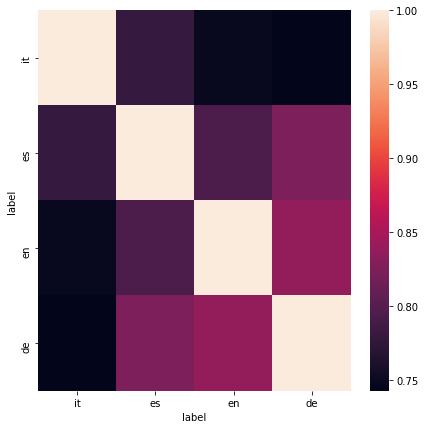

In [94]:
from pandas import DataFrame
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
sns.heatmap(DataFrame(cosine_similarity(X_train), columns = labels_train, index=labels_train))
plt.show()

In [109]:
X_test = vectorizer.transform(texts_test)
print("X_test shape:", X_test.shape)

X_test shape: (83, 12842)


In [110]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, labels_train)
labels_pred = clf.predict(X_test)

In [111]:
from sklearn.metrics import *

print(classification_report(y_pred=labels_pred, y_true=labels_test))
#accuracy_NB.append(accuracy_score(y_pred=labels_pred, y_true=labels_test))
#f1_score_NB.append(f1_score(y_true=labels_test, y_pred=labels_pred, average='micro'))

             precision    recall  f1-score   support

         de       1.00      0.87      0.93        15
         en       0.87      1.00      0.93        20
         es       0.95      1.00      0.98        21
         it       1.00      0.93      0.96        27

avg / total       0.96      0.95      0.95        83



In [112]:
from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf.fit(X_train, labels_train)
svc_labels_pred = svc_clf.predict(X_test)
print(classification_report(y_pred=svc_labels_pred, y_true=labels_test))
#accuracy_svc.append(accuracy_score(y_pred=labels_pred, y_true=labels_test))
#f1_score_svc.append(f1_score(y_true=labels_test, y_pred=labels_pred, average='micro'))

             precision    recall  f1-score   support

         de       1.00      1.00      1.00        15
         en       0.95      1.00      0.98        20
         es       1.00      1.00      1.00        21
         it       1.00      0.96      0.98        27

avg / total       0.99      0.99      0.99        83



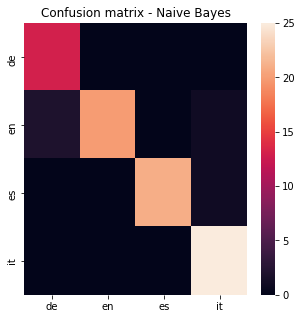

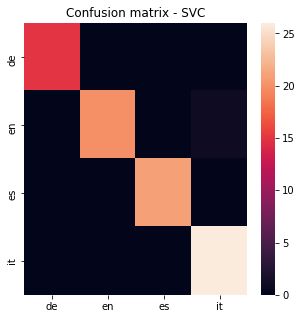

In [121]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5, 5))
sns.heatmap(DataFrame(confusion_matrix(labels_pred, labels_test), columns = clf.classes_, index = clf.classes_))
plt.title("Confusion matrix - Naive Bayes")
plt.show()
plt.figure(figsize=(5, 5))
sns.heatmap(DataFrame(confusion_matrix(svc_labels_pred, labels_test), columns = svc_clf.classes_, index = svc_clf.classes_))
plt.title("Confusion matrix - SVC")
plt.show()

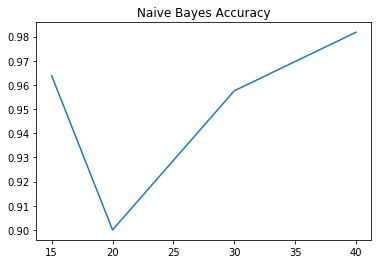

In [257]:
plt.plot([15, 20, 30, 40], accuracy_NB)
plt.title('Naive Bayes Accuracy')
plt.show()

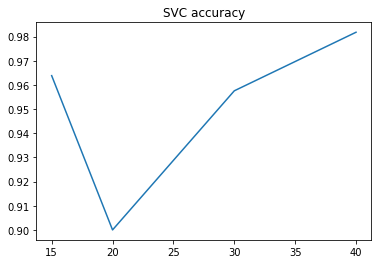

In [258]:
plt.plot([15, 20, 30, 40], accuracy_svc)
plt.title('SVC accuracy')
plt.show()

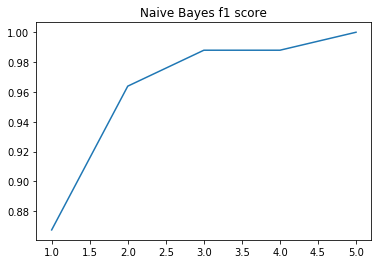

In [259]:
plt.plot([1,2,3,4,5], f1_score_NB)
plt.title('Naive Bayes f1 score')
plt.show()

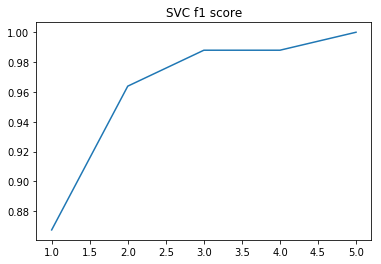

In [260]:
plt.plot([1,2,3,4,5], f1_score_svc)
plt.title('SVC f1 score')
plt.show()